In [ ]:
import os

from dotenv import load_dotenv
load_dotenv()
api_key = os.environ.get("ROBOFLOW_API_KEY")

# from google.colab import userdata
# api_key = userdata.get('ROBOFLOW_API_KEY')
# os.environ["ROBOFLOW_API_KEY"] = api_key

In [2]:
!pip install roboflow

from roboflow import Roboflow

rf = Roboflow(api_key=api_key)
print(api_key)
project = rf.workspace("personal-workspace-gf3wi").project("aircraft-zccgz-cdl21")
version = project.version(1)
dataset = version.download("yolov8")

ldEJtUKShkHReFkfgXu9
loading Roboflow workspace...
loading Roboflow project...
Exporting format yolov8 in progress : 85.0%
Version export complete for yolov8 format



Extracting Dataset Version Zip to Aircraft-1 in yolov8:: 100%|██████████| 4617/4617 [00:00<00:00, 17242.73it/s]


In [11]:
!find ./ -name "data.yaml"

./Aircraft-1/data.yaml


In [ ]:
!ls -l ./runs/detect/train/weights/

ls: cannot access './runs/detect/train/weights/': No such file or directory


In [13]:
!ls -R {dataset.location}

/home/iirs/mygithub/object-detection/aircraft-detection/notebooks/Aircraft-1:
data.yaml  README.dataset.txt  README.roboflow.txt  train  valid

/home/iirs/mygithub/object-detection/aircraft-detection/notebooks/Aircraft-1/train:
images	labels

/home/iirs/mygithub/object-detection/aircraft-detection/notebooks/Aircraft-1/train/images:
00042d9c8cb5aad4_jpg.rf.6ddc07b2d877d0ad3631b3fee5eb0ade.jpg
00042d9c8cb5aad4_jpg.rf.d898e6d50e294fe14debe00096a093e6.jpg
001afd0dec437d9b_jpg.rf.5d9add7f80806838e6e72106528a8659.jpg
001afd0dec437d9b_jpg.rf.c8eb456ef6e71967da6bab3eb0764eb6.jpg
001afd0dec437d9b_jpg.rf.f15e38a1b1c70bb1956f2aedfa9c1a74.jpg
001c11e7903b3be8_jpg.rf.106180d630a99ef73284cf0a928fa97d.jpg
001c11e7903b3be8_jpg.rf.7413d9584e647a8693de61b8e9005677.jpg
001c11e7903b3be8_jpg.rf.ab31f52131071ae4c343485d8e4078f1.jpg
002c25b9861a4901_jpg.rf.b0d817e43990768d34dd78d9fd60e0c0.jpg
002c25b9861a4901_jpg.rf.bddd9c740140ba4f097d198d1c7ce5ab.jpg
003f09605b30eafb_jpg.rf.826d6135f40faf5fee35bae8a4f7b4dd

In [14]:
!pip install Ultralytics

In [15]:
from ultralytics import YOLO

In [16]:
model = YOLO("yolov8n.pt")

# Display model information (optional)
model.info()

YOLOv8n summary: 129 layers, 3,157,200 parameters, 0 gradients, 8.9 GFLOPs


(129, 3157200, 0, 8.8575488)

In [17]:
# Train the model on the   dataset data.yaml for 100 epochs
results = model.train(data=dataset.location + "/data.yaml", epochs=100, imgsz=640)

Ultralytics 8.3.235 🚀 Python-3.13.5 torch-2.9.1+cu128 CPU (Intel Xeon W-2245 CPU @ 3.90GHz)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/home/iirs/mygithub/object-detection/aircraft-detection/notebooks/Aircraft-1/data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, o


image 1/1 /home/iirs/mygithub/object-detection/aircraft-detection/notebooks/Aircraft-1/test/images/0a52cefe360aba05_jpg.rf.651f2ee858abd7a8918b3b33da9abf2c.jpg: 640x640 1 0, 61.6ms
Speed: 3.1ms preprocess, 61.6ms inference, 0.9ms postprocess per image at shape (1, 3, 640, 640)


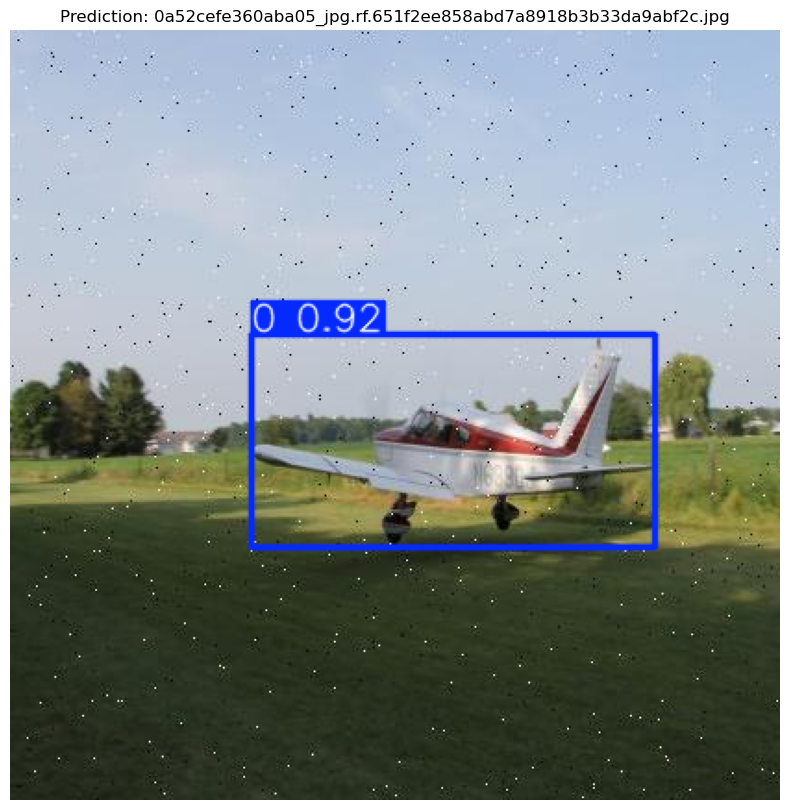


image 1/1 /home/iirs/mygithub/object-detection/aircraft-detection/notebooks/Aircraft-1/test/images/0a52cefe360aba05_jpg.rf.a183cde1ce3a8f901689076ecb377d5d.jpg: 640x640 1 0, 27.4ms
Speed: 1.7ms preprocess, 27.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


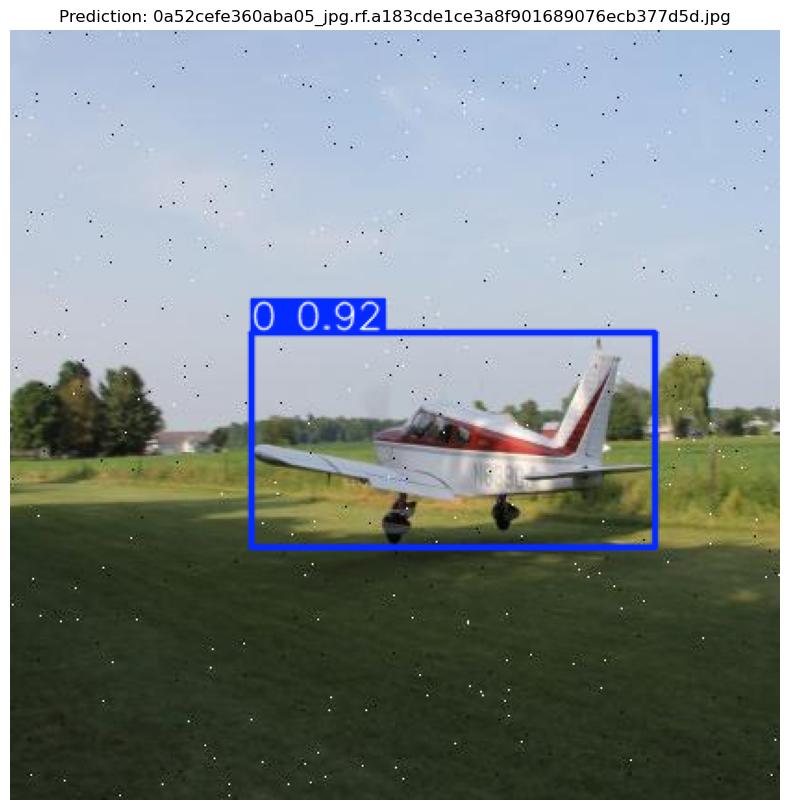


image 1/1 /home/iirs/mygithub/object-detection/aircraft-detection/notebooks/Aircraft-1/test/images/0a9f2c5472a06c90_jpg.rf.99133392917d724e19404a6e39345f8b.jpg: 640x640 1 0, 31.9ms
Speed: 2.2ms preprocess, 31.9ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


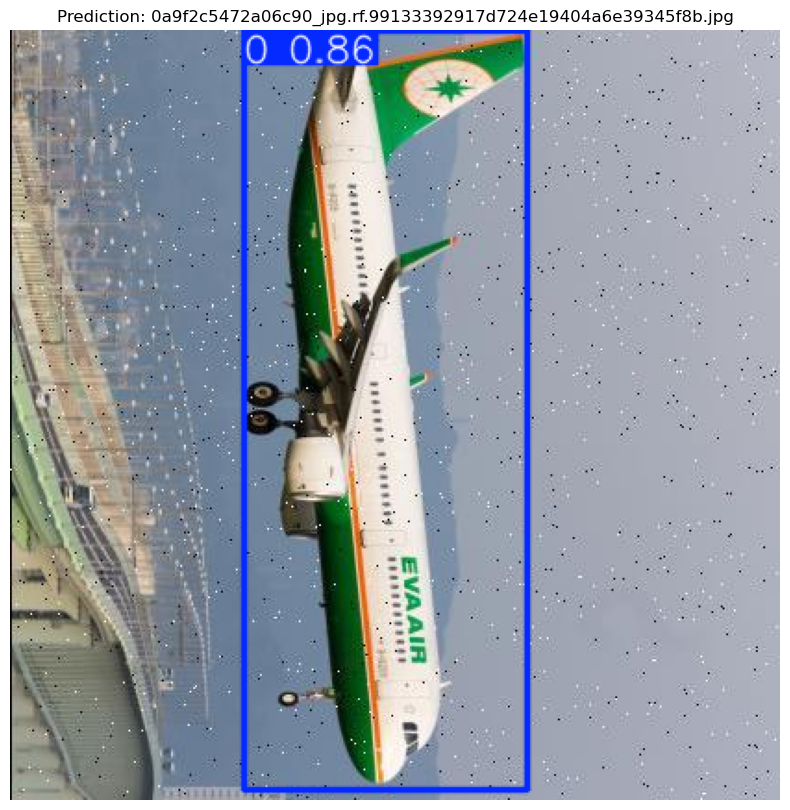


image 1/1 /home/iirs/mygithub/object-detection/aircraft-detection/notebooks/Aircraft-1/test/images/0a52cefe360aba05_jpg.rf.a2041dac4ee6d14986b3e9680c009040.jpg: 640x640 1 0, 34.2ms
Speed: 1.6ms preprocess, 34.2ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


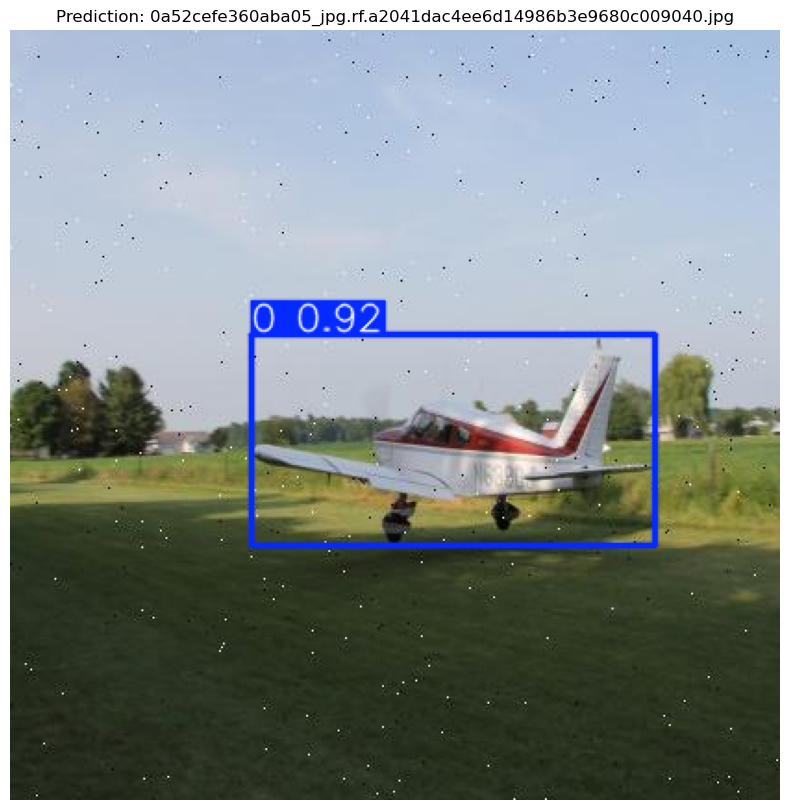


image 1/1 /home/iirs/mygithub/object-detection/aircraft-detection/notebooks/Aircraft-1/test/images/0a9f2c5472a06c90_jpg.rf.9a12c46d4688efeac09dba461866aeca.jpg: 640x640 1 0, 39.7ms
Speed: 1.9ms preprocess, 39.7ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


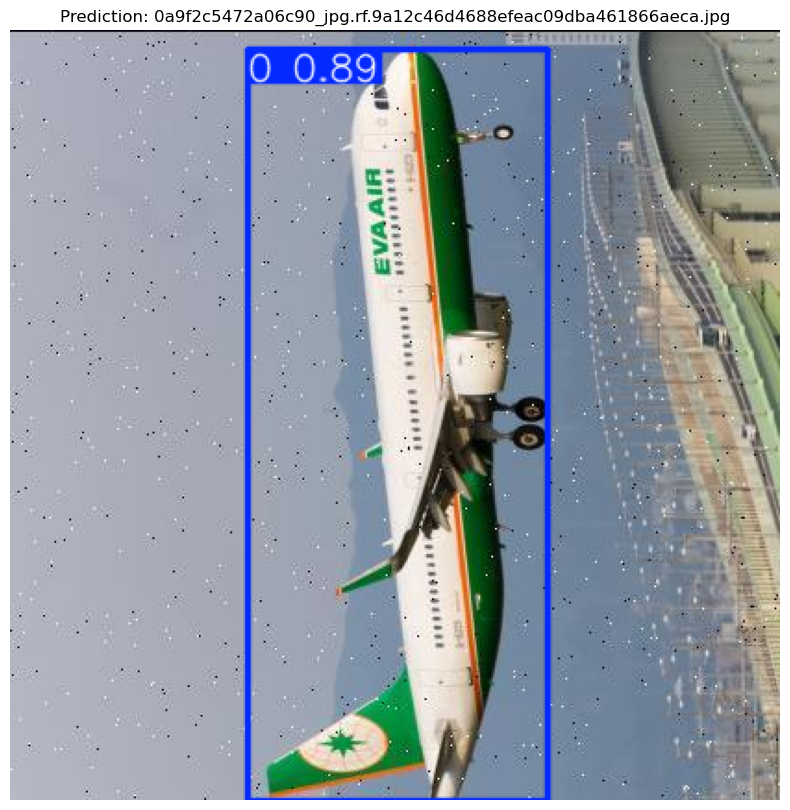

In [1]:
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import glob
import random

# Load trained model
model = YOLO("./runs/detect/train/weights/best.pt")
#The best.pt file is the model checkpoint that achieved the highest mAP accuracy during training.

# Collect all test images #This model will now be used to detect ships on new unseen images.
image_paths = glob.glob("./Aircraft-1/test/images/*")
#These images were never used during training or validation, so they help us measure true model performance.”

# Select 10 random images # Test of the model on 10%
random_images = random.sample(image_paths, 5)
#“For each selected image, we pass it through the YOLO model.YOLO predicts ship locations, draws bounding boxes, and returns confidence scores.”

# Run predictions and display
for img_path in random_images:
    results = model(img_path)

    # Get predicted image with bounding boxes around the ship detection.
    pred_img = results[0].plot()

    # Convert BGR → RGB for matplotlib and converting image format into display
    pred_img_rgb = cv2.cvtColor(pred_img, cv2.COLOR_BGR2RGB)

    plt.figure(figsize=(10, 10))
    plt.imshow(pred_img_rgb)
    plt.axis("off")
    plt.title(f"Prediction: {img_path.split('/')[-1]}")
    plt.show()